100%|██████████| 20000/20000 [00:12<00:00, 1566.80it/s]


40000
image shape: (32, 32, 3)
total image shape: (32000, 32, 32, 3)
image shape: (32, 32, 3)
total image shape: (8000, 32, 32, 3)
Epoch 1/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0773 - accuracy: 0.9798 - val_loss: 0.0234 - val_accuracy: 0.9944
Epoch 2/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0308 - accuracy: 0.9924 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 3/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0210 - accuracy: 0.9952 - val_loss: 0.0114 - val_accuracy: 0.9952
Epoch 4/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0172 - accuracy: 0.9958 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 5/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0450 - accuracy: 0.9921 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 6/20
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0279 - accuracy: 0.9942 - val_loss: 0.0412 - val_accuracy: 

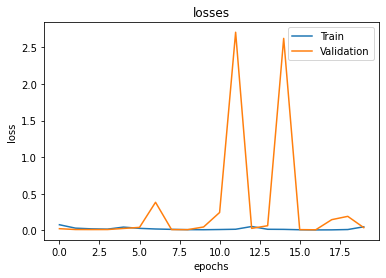

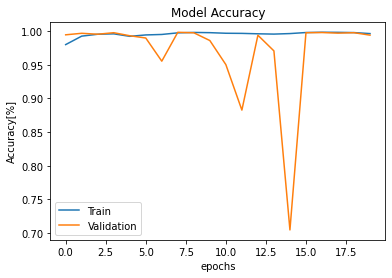

In [1]:
# Package included remove package that should not be include

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model

# allow memory
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Call dataset 
# ************************NEU dataset*************************
DATADIR = "./crack"
CATEGORIES = ["negative", "positive"]

# Pre-processing

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array ,cv2.IMREAD_GRAYSCALE
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!
 
        break  # we just want one for now so break
    break 
 
training_data = []
 
def create_training_data():
    for category in CATEGORIES:  # do dogs and cats
 
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
 
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
          if img.endswith("jpg"):
            img_array = cv2.imread(os.path.join(path,img)) # ,cv2.IMREAD_GRAYSCALE# convert to array ,cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data
 
create_training_data()
 
print(len(training_data))

# Split dataset 80:20 ratio 
import tensorflow as tf
from sklearn.model_selection import train_test_split
X = []
y = []
 
for features,label in training_data:
    X.append(features)
    y.append(label)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42, shuffle=True)
 
x_train = np.asarray(X_train,dtype=np.float32)/255.0
print("image shape:",x_train[0].shape)
print("total image shape:",x_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7, dtype='float32')# change the number class
x_test = np.asarray(X_test,dtype=np.float32)/255.0
print("image shape:",x_test[0].shape)
print("total image shape:",x_test.shape)
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=7, dtype='float32')# change number class 

# Training using Transfer Learning
#choose suitable transfer learning
base_model=MobileNet(weights='imagenet',include_top=False) # input_shape=(None,None,3)imports the mobilenet model and discards the last 1000 neuron layer.

# Classify the dataset
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dropout(0.5)(x)
preds=Dense(7,activation='softmax')(x) #final layer with softmax activation change based on class
 
model=Model(inputs=base_model.input,outputs=preds)
 
#to freeze and unfreeze the layer
for layer in model.layers[:20]:
    layer.trainable=True
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train,y_train,validation_data=(x_test,y_test2),batch_size=32,epochs=20)
score=model.evaluate(x_test,y_test2,verbose=0)
print("accuracy = ",score[1])
#model.summary()

#plot the performance of the project
plt.plot(history.history['loss'], label = "Train") 
plt.plot(history.history['val_loss'], label = "Validation")
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation") 
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()